In [1]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
import math
import random
from IPython import display
from scipy.signal import savgol_filter

df=pd.read_csv("Dataset.csv")
df.head()

,X1,X2,Y
0,75,70,1
1,56,10,1
2,59,9,1
3,5,15,0
4,41,77,0


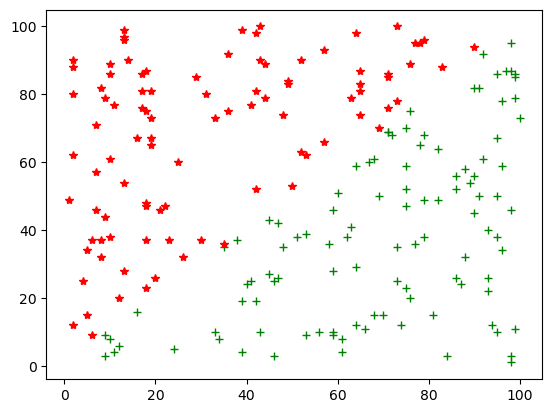

In [2]:
X1=df["X1"].values.tolist()
X2=df["X2"].values.tolist()
Y=df["Y"].values.tolist()

for i in range(len(Y)):
    if Y[i]==0:
        plt.plot(X1[i],X2[i],"r*")
    else:
        plt.plot(X1[i], X2[i], "g+")
        

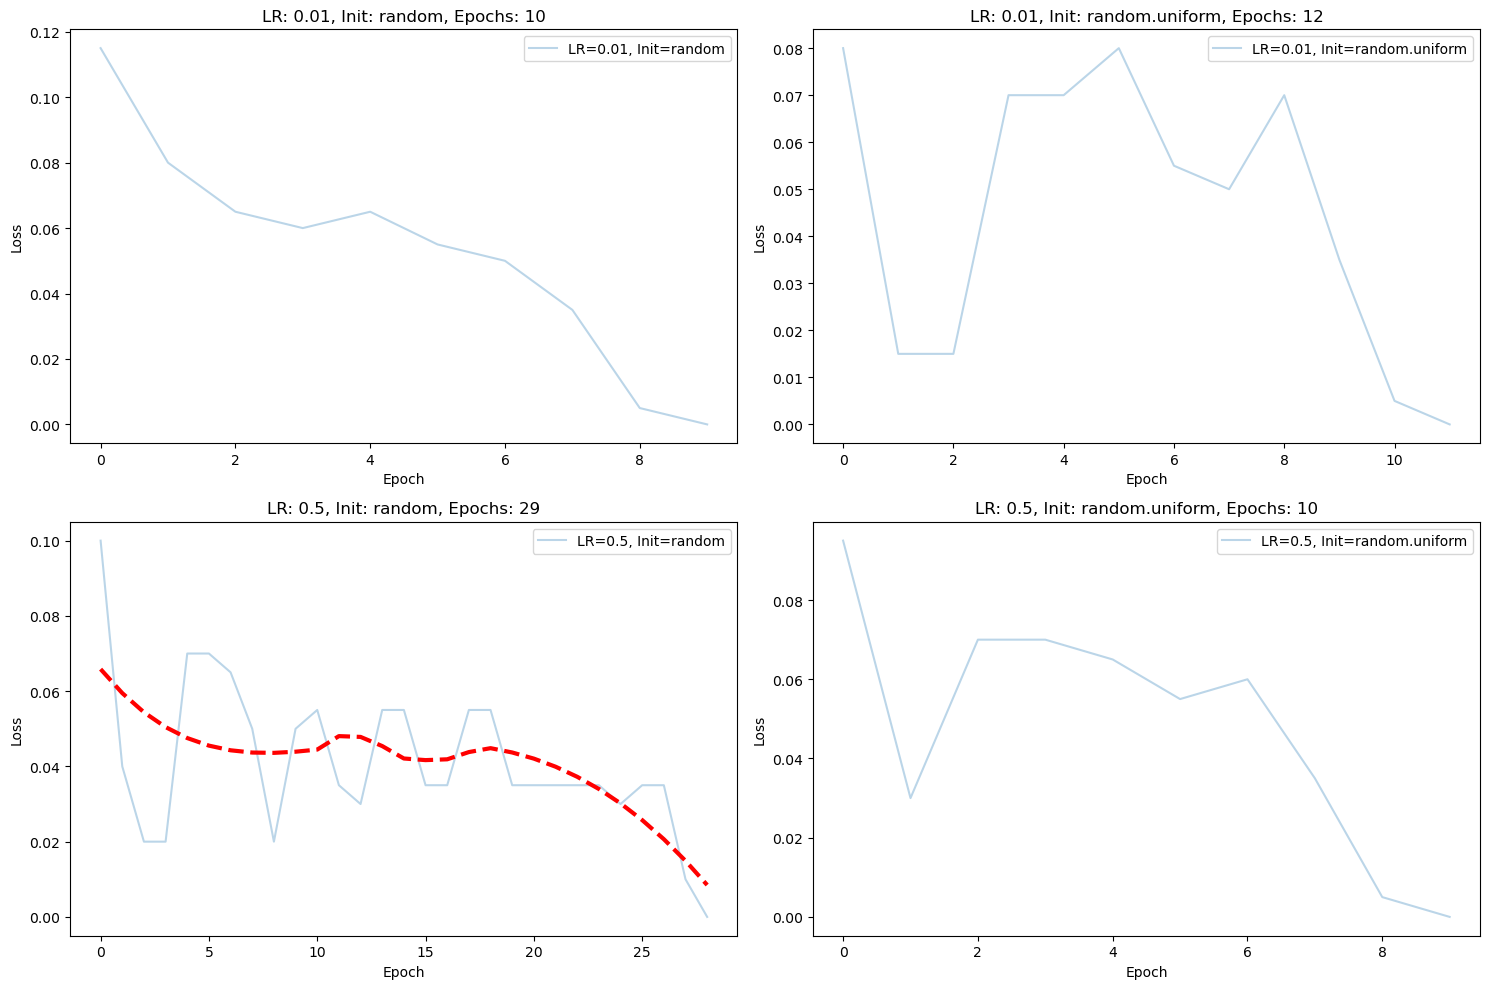

In [3]:

learning_rates = [0.01, 0.5]
weight = ["random", "random.uniform"]

theta = 0.05

plt.figure(figsize=(15, 10))

for i, lr in enumerate(learning_rates):
    for j, wg in enumerate(weight):
        if wg == "random":
            w = [random.random(), random.random()]
            b = random.random()
        else:
            w = [random.uniform(-1, 1), random.uniform(-1, 1)]
            b = random.uniform(-1, 1)
        
        epoch = 0
        count = 0
        loss = []
        epochs_to_compare = 0
        
        while count < len(Y):
            total_error = 0
            for y in range(len(Y)):
                weighted_sum = w[0] * X1[y] + w[1] * X2[y] + b
                pred = 1 if weighted_sum > theta else 0
                error = Y[y] - pred
                
                if error != 0:
                    count = 0
                    total_error += math.sqrt(error ** 2)
                    w[0] += lr * error * X1[y]
                    w[1] += lr * error * X2[y]
                    b += lr * error
                else:
                    count += 1
            
            loss.append(1 / len(X1) * total_error)
            epochs_to_compare += 1
            
            
            epoch += 1
        

        plt.subplot(2, 2, i * 2 + j + 1)
        plt.plot(loss, alpha=0.3, label=f"LR={lr}, Init={wg}")
        if epoch > 20:
            yhat = savgol_filter(loss, 21, 3)
            plt.plot(yhat, 'r--', lw=3)
        plt.xlabel("Epoch")
        plt.ylabel("Loss")
        plt.title(f"LR: {lr}, Init: {wg}, Epochs: {epochs_to_compare}")
        plt.legend()

plt.tight_layout()
plt.show()

        
            
    